## Depencies, Set up, and Path Creation

In [195]:
#Dependencies and Set Up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns  # For heatmap visualization
from sklearn.preprocessing import StandardScaler

In [196]:
%notebook widget

In [197]:
#Created a path to the file making it into a dataframe
rent_file = pd.read_csv("Raw_Price_Data//price.csv")

rent_df = pd.DataFrame(rent_file)

rent_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


## Cleaning and Sorting Data

In [198]:
#Identified what columns are missing data
clean_rent_df = rent_df.dropna(how = 'any')

clean_rent_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.0,1080.0,1071.0,1067.0,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247


In [199]:
#Extracted states from data (CA, IL, NY, TX)
four_states = ["NY", "CA", "IL", "TX"]

four_states_df = rent_df[rent_df['State'].isin(four_states)]

four_states_df.head(20)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
7,6915,San Antonio,San Antonio,Bexar,TX,8,1057.0,1043.0,1037.0,1032.0,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,1250
8,54296,San Diego,San Diego,San Diego,CA,9,2070.0,2059.0,2043.0,2030.0,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1114.0,1135.0,1156.0,1159.0,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,1391
10,33839,San Jose,San Jose,Santa Clara,CA,11,2359.0,2367.0,2360.0,2343.0,...,3347,3368,3386,3391,3383,3363,3341,3320,3300,3286
12,20330,San Francisco,San Francisco,San Francisco,CA,13,3188.0,3207.0,3189.0,3127.0,...,4527,4519,4517,4511,4500,4488,4472,4457,4424,4382
14,10221,Austin,Austin,Travis,TX,15,1293.0,1301.0,1312.0,1325.0,...,1790,1799,1807,1808,1803,1795,1789,1788,1786,1780


In [200]:
#Dropped all NaN values
rent_df.dropna(inplace = True)

#Display the DataFrame
rent_df.head()


,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
5,40326,Phoenix,Phoenix,Maricopa,AZ,6,1087.0,1080.0,1071.0,1067.0,...,1228,1236,1240,1240,1238,1238,1239,1241,1244,1247


In [201]:
#New York Data Frame
NY_state = ["NY"]

NY_state_df = rent_df[rent_df['State'].isin(NY_state)]

NY_state_df.head(20)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
72,17222,Buffalo,Buffalo,Erie,NY,73,881.0,919.0,950.0,955.0,...,873,868,861,857,862,868,876,883,881,878
109,13550,Rochester,Rochester,Monroe,NY,110,959.0,979.0,985.0,951.0,...,950,953,952,945,937,936,943,950,952,951
184,7353,Syracuse,Syracuse,Onondaga,NY,185,1131.0,1131.0,1113.0,1072.0,...,1111,1113,1104,1093,1080,1076,1078,1075,1064,1054
248,30211,Amherst,Buffalo,Erie,NY,249,1500.0,1512.0,1518.0,1516.0,...,1667,1665,1674,1680,1688,1688,1695,1704,1714,1717
341,399214,Town of Greece,Rochester,Monroe,NY,342,936.0,959.0,1012.0,1052.0,...,1341,1354,1364,1367,1360,1349,1340,1340,1338,1339
342,37074,Albany,Albany,Albany,NY,343,1452.0,1457.0,1460.0,1422.0,...,1432,1439,1439,1438,1434,1423,1410,1400,1396,1396
525,37840,Cheektowaga,Buffalo,Erie,NY,526,996.0,1022.0,1039.0,1047.0,...,1113,1121,1140,1155,1177,1192,1205,1198,1196,1200
566,397629,Town of Colonie,Albany,Albany,NY,567,1525.0,1544.0,1550.0,1539.0,...,1630,1647,1657,1651,1651,1658,1670,1676,1673,1664
778,40779,Schenectady,Albany,Schenectady,NY,779,1403.0,1405.0,1403.0,1409.0,...,1293,1312,1328,1334,1331,1308,1279,1253,1236,1229
814,397214,Town of Hamburg,Buffalo,Erie,NY,815,1229.0,1260.0,1260.0,1267.0,...,1421,1421,1411,1386,1336,1279,1240,1243,1266,1302


In [202]:
#California Data Frame
CA_state = ["CA"]

CA_state_df = rent_df[rent_df['State'].isin(CA_state)]

CA_state_df.head(20)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
8,54296,San Diego,San Diego,San Diego,CA,9,2070.0,2059.0,2043.0,2030.0,...,2414,2428,2438,2442,2441,2442,2449,2457,2465,2469
10,33839,San Jose,San Jose,Santa Clara,CA,11,2359.0,2367.0,2360.0,2343.0,...,3347,3368,3386,3391,3383,3363,3341,3320,3300,3286
12,20330,San Francisco,San Francisco,San Francisco,CA,13,3188.0,3207.0,3189.0,3127.0,...,4527,4519,4517,4511,4500,4488,4472,4457,4424,4382
33,18203,Fresno,Fresno,Fresno,CA,34,1260.0,1249.0,1242.0,1228.0,...,1209,1214,1216,1217,1217,1221,1226,1231,1236,1241
34,20288,Sacramento,Sacramento,Sacramento,CA,35,1295.0,1292.0,1284.0,1273.0,...,1445,1459,1469,1476,1482,1489,1492,1495,1499,1504
36,46298,Long Beach,Los Angeles,Los Angeles,CA,37,1976.0,1971.0,1968.0,1964.0,...,2310,2326,2332,2336,2335,2334,2338,2350,2364,2375
42,13072,Oakland,San Francisco,Alameda,CA,43,1894.0,1861.0,1816.0,1767.0,...,2795,2819,2845,2869,2883,2890,2895,2892,2886,2882
53,16764,Anaheim,Los Angeles,Orange,CA,54,2181.0,2181.0,2179.0,2170.0,...,2524,2539,2553,2569,2582,2591,2598,2599,2602,2608
54,47568,Santa Ana,Los Angeles,Orange,CA,55,1994.0,1996.0,1996.0,1996.0,...,2450,2464,2471,2469,2465,2461,2462,2465,2467,2473


In [203]:
#Illinois Data Frame
IL_state = ["IL"]

IL_state_df = rent_df[rent_df['State'].isin(IL_state)]

IL_state_df.head(20)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
152,10215,Aurora,Chicago,Kane,IL,153,1390.0,1395.0,1396.0,1397.0,...,1557,1545,1534,1528,1526,1526,1533,1538,1544,1543
176,39931,Naperville,Chicago,Du Page,IL,177,2008.0,2015.0,2031.0,2049.0,...,2325,2318,2312,2311,2314,2313,2309,2311,2314,2318
244,32238,Joliet,Chicago,Will,IL,245,1300.0,1302.0,1296.0,1289.0,...,1393,1391,1385,1379,1378,1381,1382,1373,1360,1345
281,19903,Peoria,Peoria,Peoria,IL,282,1196.0,1207.0,1211.0,1213.0,...,911,909,886,856,832,826,833,848,856,864
384,17943,Elgin,Chicago,Kane,IL,385,1400.0,1406.0,1405.0,1409.0,...,1605,1597,1585,1573,1563,1554,1551,1553,1555,1556
424,44597,Cicero,Chicago,Cook,IL,425,1320.0,1337.0,1334.0,1325.0,...,1412,1419,1421,1421,1418,1408,1401,1395,1393,1391
489,23742,Bloomington,Bloomington,McLean,IL,490,1367.0,1408.0,1450.0,1486.0,...,1254,1232,1221,1211,1195,1178,1174,1200,1226,1255
502,50764,Arlington Heights,Chicago,Cook,IL,503,1710.0,1726.0,1742.0,1745.0,...,1945,1944,1944,1956,1971,1988,1990,1992,1990,1996
509,18025,Evanston,Chicago,Cook,IL,510,1676.0,1691.0,1704.0,1704.0,...,1912,1910,1907,1909,1910,1912,1913,1918,1921,1922


In [204]:
#Texas Data Frame
TX_state = ["TX"]

TX_state_df = rent_df[rent_df['State'].isin(TX_state)]

TX_state_df.head(20)

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
7,6915,San Antonio,San Antonio,Bexar,TX,8,1057.0,1043.0,1037.0,1032.0,...,1244,1245,1245,1241,1236,1234,1235,1239,1245,1250
9,38128,Dallas,Dallas-Fort Worth,Dallas,TX,10,1114.0,1135.0,1156.0,1159.0,...,1338,1347,1353,1358,1364,1370,1377,1385,1389,1391
14,10221,Austin,Austin,Travis,TX,15,1293.0,1301.0,1312.0,1325.0,...,1790,1799,1807,1808,1803,1795,1789,1788,1786,1780
15,18172,Fort Worth,Dallas-Fort Worth,Tarrant,TX,16,1152.0,1160.0,1166.0,1166.0,...,1346,1351,1354,1353,1351,1352,1357,1365,1371,1375
20,17933,El Paso,El Paso,El Paso,TX,21,1085.0,1083.0,1080.0,1072.0,...,1023,1016,1010,1005,1004,1004,1005,1001,997,993
49,50763,Arlington,Dallas-Fort Worth,Tarrant,TX,50,1207.0,1214.0,1213.0,1211.0,...,1410,1418,1425,1428,1430,1432,1435,1439,1443,1447
57,38025,Corpus Christi,Corpus Christi,Nueces,TX,58,1157.0,1161.0,1158.0,1156.0,...,1403,1393,1381,1368,1364,1367,1372,1375,1371,1363
71,53915,Plano,Dallas-Fort Worth,Collin,TX,72,1657.0,1670.0,1674.0,1674.0,...,1948,1952,1957,1956,1953,1947,1943,1944,1946,1951
79,53060,Lubbock,Lubbock,Lubbock,TX,80,1101.0,1106.0,1108.0,1107.0,...,1183,1182,1178,1175,1175,1176,1180,1183,1181,1176


In [205]:
#Made all of the columns into a list
columns_list = ['January 2011',
'February 2011','March 2011','April 2011','May 2011','June 2011','July 2011',
'August 2011','September 2011','October 2011','November 2011','December 2011',
'January 2012','February 2012','March 2012','April 2012','May 2012','June 2012',
'July 2012','August 2012','September 2012','October 2012','November 2012','December 2012',
'January 2013','February 2013','March 2013','April 2013','May 2013','June 2013','July 2013',
'August 2013','September 2013','October 2013','November 2013','December 2013','January 2014',
'February 2014','March 2014','April 2014','May 2014','June 2014','July 2014','August 2014',
'September 2014','October 2014','November 2014','December 2014','January 2015','February 2015',
'March 2015','April 2015','May 2015','June 2015','July 2015','August 2015','September 2015','October 2015',
'November 2015','December 2015','January 2016','February 2016','March 2016','April 2016','May 2016',
'June 2016','July 2016','August 2016','September 2016','October 2016','November 2016','December 2016']


In [206]:
# US median rent prices
US_med_list = []

for i in columns_list:

    US_med_rent = np.median(clean_rent_df[i])

    US_med_list.append(US_med_rent)

print(US_med_list)

[1218.0, 1219.0, 1220.0, 1220.0, 1218.0, 1217.0, 1214.0, 1213.0, 1210.0, 1207.0, 1206.0, 1205.0, 1204.0, 1205.0, 1207.0, 1206.0, 1205.0, 1205.0, 1205.0, 1206.0, 1208.0, 1210.0, 1215.0, 1215.0, 1215.0, 1216.0, 1217.0, 1217.0, 1218.0, 1221.0, 1224.0, 1225.0, 1228.0, 1231.0, 1235.0, 1236.0, 1236.0, 1234.0, 1232.0, 1229.0, 1227.0, 1223.0, 1226.0, 1232.0, 1245.0, 1253.0, 1259.0, 1263.0, 1269.0, 1272.0, 1276.0, 1280.0, 1284.0, 1289.0, 1295.0, 1299.0, 1298.0, 1294.0, 1293.0, 1292.0, 1294.0, 1298.0, 1303.0, 1308.0, 1312.0, 1313.0, 1311.0, 1306.0, 1305.0, 1305.0, 1307.0, 1308.0]


In [207]:
# Put US med rent prices for each month and year into a DF
US_med_df = pd.DataFrame(US_med_list, columns_list).T 

US_med_df.head()

,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,1218.0,1219.0,1220.0,1220.0,1218.0,1217.0,1214.0,1213.0,1210.0,1207.0,...,1303.0,1308.0,1312.0,1313.0,1311.0,1306.0,1305.0,1305.0,1307.0,1308.0


In [208]:
# For loop to calculate the median value of each column in IL
IL_med_list = []

for i in columns_list:

    IL_med_rent = np.median(IL_state_df[i])

    IL_med_list.append(IL_med_rent)

print(IL_med_list)

[1425.0, 1426.0, 1422.5, 1421.5, 1413.5, 1406.5, 1392.5, 1382.0, 1380.0, 1370.0, 1363.5, 1355.5, 1349.0, 1344.0, 1341.0, 1344.0, 1344.0, 1347.5, 1347.0, 1346.0, 1351.0, 1359.5, 1371.0, 1370.0, 1364.5, 1351.5, 1345.5, 1347.0, 1354.0, 1360.0, 1363.0, 1364.5, 1372.5, 1379.0, 1385.5, 1392.0, 1399.0, 1400.5, 1395.0, 1393.0, 1387.0, 1385.5, 1379.5, 1384.0, 1385.0, 1386.5, 1397.0, 1406.5, 1411.5, 1408.0, 1416.5, 1414.5, 1413.0, 1413.0, 1414.5, 1414.0, 1411.0, 1403.0, 1398.5, 1396.0, 1405.5, 1408.0, 1413.0, 1416.5, 1424.5, 1424.0, 1431.0, 1426.5, 1418.0, 1410.0, 1405.0, 1397.0]


In [209]:
# Put IL med rent prices for each month and year into a DF
IL_med_df = pd.DataFrame(IL_med_list, columns_list).T 

IL_med_df.head()

,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,1425.0,1426.0,1422.5,1421.5,1413.5,1406.5,1392.5,1382.0,1380.0,1370.0,...,1413.0,1416.5,1424.5,1424.0,1431.0,1426.5,1418.0,1410.0,1405.0,1397.0


In [210]:
# For loop to calculate the median value of each column in CA
CA_med_list = []

for i in columns_list:

    CA_med_rent = np.median(CA_state_df[i])

    CA_med_list.append(CA_med_rent)

print(CA_med_list)

[1770.0, 1754.0, 1738.5, 1729.0, 1716.5, 1717.5, 1719.5, 1718.0, 1712.5, 1710.5, 1710.0, 1705.0, 1702.5, 1695.5, 1696.5, 1697.0, 1700.5, 1713.5, 1710.5, 1709.0, 1702.0, 1704.5, 1700.0, 1701.0, 1707.5, 1718.5, 1728.0, 1735.0, 1743.0, 1756.5, 1763.0, 1764.5, 1767.0, 1773.5, 1779.5, 1781.5, 1782.5, 1781.0, 1785.5, 1784.5, 1787.0, 1790.0, 1794.0, 1807.5, 1824.0, 1842.5, 1859.5, 1875.0, 1885.0, 1899.0, 1907.0, 1921.5, 1935.0, 1946.0, 1957.0, 1969.0, 1977.0, 1982.0, 1995.0, 2004.0, 2014.5, 2036.5, 2056.0, 2062.5, 2072.0, 2092.0, 2104.0, 2115.0, 2124.5, 2128.5, 2134.0, 2150.5]


In [211]:
# Put CA med rent prices for each month and year into a DF
CA_med_df = pd.DataFrame(CA_med_list, columns_list).T 

CA_med_df.head()

,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,1770.0,1754.0,1738.5,1729.0,1716.5,1717.5,1719.5,1718.0,1712.5,1710.5,...,2056.0,2062.5,2072.0,2092.0,2104.0,2115.0,2124.5,2128.5,2134.0,2150.5


In [212]:
# For loop to calculate the median value of each column in TX
TX_med_list=[]
for i in columns_list:

    TX_med_rent = np.median(TX_state_df[i])

    TX_med_list.append(TX_med_rent)

print(TX_med_list)  

   

[1194.0, 1189.0, 1186.0, 1183.0, 1182.0, 1189.0, 1184.0, 1179.0, 1181.0, 1174.0, 1173.0, 1167.0, 1164.0, 1162.0, 1165.0, 1159.0, 1155.0, 1158.0, 1168.0, 1172.0, 1177.0, 1179.0, 1173.0, 1171.0, 1175.0, 1174.0, 1181.0, 1196.0, 1202.0, 1200.0, 1197.0, 1201.0, 1205.0, 1208.0, 1212.0, 1221.0, 1224.0, 1224.0, 1222.0, 1225.0, 1221.0, 1218.0, 1221.0, 1234.0, 1245.0, 1256.0, 1272.0, 1275.0, 1282.0, 1287.0, 1289.0, 1297.0, 1300.0, 1309.0, 1313.0, 1319.0, 1323.0, 1325.0, 1320.0, 1312.0, 1313.0, 1319.0, 1326.0, 1325.0, 1338.0, 1346.0, 1350.0, 1343.0, 1340.0, 1335.0, 1335.0, 1337.0]


In [213]:
# Put TX med rent prices for each month and year into a DF
TX_med_df = pd.DataFrame(TX_med_list, columns_list).T 

TX_med_df.head()

,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,1194.0,1189.0,1186.0,1183.0,1182.0,1189.0,1184.0,1179.0,1181.0,1174.0,...,1326.0,1325.0,1338.0,1346.0,1350.0,1343.0,1340.0,1335.0,1335.0,1337.0


In [214]:
# For loop to calculate the median value of each column in NY
NY_med_list=[]

for i in columns_list:

    NY_med_rent = np.median(NY_state_df[i])
    NY_med_list.append(NY_med_rent)

print(NY_med_list)  



[1369.5, 1383.5, 1380.5, 1388.0, 1390.5, 1401.0, 1401.0, 1399.0, 1397.0, 1399.0, 1400.5, 1399.0, 1391.5, 1383.0, 1376.0, 1378.0, 1396.0, 1411.0, 1428.5, 1438.0, 1437.5, 1431.0, 1417.5, 1416.0, 1419.5, 1432.0, 1434.0, 1431.5, 1434.0, 1418.5, 1384.5, 1368.5, 1366.5, 1379.0, 1398.5, 1395.0, 1378.5, 1360.0, 1357.5, 1351.0, 1341.0, 1342.0, 1362.5, 1382.0, 1400.5, 1410.0, 1418.5, 1430.0, 1440.5, 1443.0, 1449.0, 1448.5, 1444.5, 1437.5, 1428.5, 1403.0, 1388.5, 1376.0, 1371.5, 1363.0, 1368.0, 1365.0, 1374.5, 1380.0, 1385.5, 1390.5, 1401.5, 1399.0, 1394.5, 1392.5, 1389.5, 1386.5]


In [215]:
#Put NY med rent prices for each month and year into a DF
NY_med_df = pd.DataFrame(NY_med_list, columns_list).T 

NY_med_df.head()

,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,October 2011,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,1369.5,1383.5,1380.5,1388.0,1390.5,1401.0,1401.0,1399.0,1397.0,1399.0,...,1374.5,1380.0,1385.5,1390.5,1401.5,1399.0,1394.5,1392.5,1389.5,1386.5


In [216]:
#Combined Median rent data for 4 states
TX_CA_df = pd.concat([TX_med_df, CA_med_df], axis=0, ignore_index=True)

IL_NY_df = pd.concat([IL_med_df, NY_med_df], axis=0, ignore_index=True)

states_med_rent = pd.concat([TX_CA_df, IL_NY_df], axis=0, ignore_index=True)

#0 = TX, 1 = CA, 2 = IL, 3 = NY
states_med_rent.insert(0, "States", ["TX", "CA", "IL", "NY"])

states_med_rent.head()


,States,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,TX,1194.0,1189.0,1186.0,1183.0,1182.0,1189.0,1184.0,1179.0,1181.0,...,1326.0,1325.0,1338.0,1346.0,1350.0,1343.0,1340.0,1335.0,1335.0,1337.0
1,CA,1770.0,1754.0,1738.5,1729.0,1716.5,1717.5,1719.5,1718.0,1712.5,...,2056.0,2062.5,2072.0,2092.0,2104.0,2115.0,2124.5,2128.5,2134.0,2150.5
2,IL,1425.0,1426.0,1422.5,1421.5,1413.5,1406.5,1392.5,1382.0,1380.0,...,1413.0,1416.5,1424.5,1424.0,1431.0,1426.5,1418.0,1410.0,1405.0,1397.0
3,NY,1369.5,1383.5,1380.5,1388.0,1390.5,1401.0,1401.0,1399.0,1397.0,...,1374.5,1380.0,1385.5,1390.5,1401.5,1399.0,1394.5,1392.5,1389.5,1386.5


In [217]:
#Created a table with US Med in it

ALL_med_rent = pd.concat([states_med_rent, US_med_df], axis=0, ignore_index=True)

#ALL_med_rent.reset_index(drop=True)
#ALL_med_rent.set_index('State', inplace=True, drop=True)
#ALL_med_rent[ALL_med_rent.index[-1]] = "US"
ALL_med_rent.insert(0, "State", ["TX", "CA", "IL", "NY", "US"])

ALL_med_rent.drop(["States"], axis = 1, inplace=True)
ALL_med_rent.head()

,State,January 2011,February 2011,March 2011,April 2011,May 2011,June 2011,July 2011,August 2011,September 2011,...,March 2016,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016
0,TX,1194.0,1189.0,1186.0,1183.0,1182.0,1189.0,1184.0,1179.0,1181.0,...,1326.0,1325.0,1338.0,1346.0,1350.0,1343.0,1340.0,1335.0,1335.0,1337.0
1,CA,1770.0,1754.0,1738.5,1729.0,1716.5,1717.5,1719.5,1718.0,1712.5,...,2056.0,2062.5,2072.0,2092.0,2104.0,2115.0,2124.5,2128.5,2134.0,2150.5
2,IL,1425.0,1426.0,1422.5,1421.5,1413.5,1406.5,1392.5,1382.0,1380.0,...,1413.0,1416.5,1424.5,1424.0,1431.0,1426.5,1418.0,1410.0,1405.0,1397.0
3,NY,1369.5,1383.5,1380.5,1388.0,1390.5,1401.0,1401.0,1399.0,1397.0,...,1374.5,1380.0,1385.5,1390.5,1401.5,1399.0,1394.5,1392.5,1389.5,1386.5
4,US,1218.0,1219.0,1220.0,1220.0,1218.0,1217.0,1214.0,1213.0,1210.0,...,1303.0,1308.0,1312.0,1313.0,1311.0,1306.0,1305.0,1305.0,1307.0,1308.0


In [218]:
#Got median rent for TX by year and make df
TX_2011_rents = [1194.0, 1189.0, 1186.0, 1183.0, 1182.0, 1189.0, 1184.0, 1179.0, 1181.0, 1174.0, 1173.0, 1167.0]
TX_2012_rents = [1164.0, 1162.0, 1165.0, 1159.0, 1155.0, 1158.0, 1168.0, 1172.0, 1177.0, 1179.0, 1173.0, 1171.0]
TX_2013_rents = [1175.0, 1174.0, 1181.0, 1196.0, 1202.0, 1200.0, 1197.0, 1201.0, 1205.0, 1208.0, 1212.0, 1221.0]
TX_2014_rents = [1224.0, 1224.0, 1222.0, 1225.0, 1221.0, 1218.0, 1221.0, 1234.0, 1245.0, 1256.0, 1272.0, 1275.0]
TX_2015_rents = [1282.0, 1287.0, 1289.0, 1297.0, 1300.0, 1309.0, 1313.0, 1319.0, 1323.0, 1325.0, 1320.0, 1312.0]
TX_2016_rents = [1313.0, 1319.0, 1326.0, 1325.0, 1338.0, 1346.0, 1350.0, 1343.0, 1340.0, 1335.0, 1335.0, 1337.0]


TX_2011_med = np.median(TX_2011_rents)
TX_2012_med = np.median(TX_2012_rents)
TX_2013_med = np.median(TX_2013_rents)
TX_2014_med = np.median(TX_2014_rents)
TX_2015_med = np.median(TX_2015_rents)
TX_2016_med = np.median(TX_2016_rents)

TX_yearly_rent = {"2011":[TX_2011_med], "2012" :[TX_2012_med], "2013" :[TX_2013_med], "2014" :[TX_2014_med], "2015" :[TX_2015_med], "2016" :[TX_2016_med]}

TX_yearly_rent_df = pd.DataFrame(TX_yearly_rent)

TX_yearly_rent_df.insert(0, "State", ["TX"])

TX_yearly_rent_df.set_index('State', inplace=True, drop=True)

TX_yearly_rent_df.head(10)


,2011,2012,2013,2014,2015,2016
State,,,,,,
TX,1182.5,1166.5,1200.5,1224.5,1310.5,1336.0


In [219]:
#Got median rent for CA by year and make df
CA_2011_rents = [1770.0, 1754.0, 1738.5, 1729.0, 1716.5, 1717.5, 1719.5, 1718.0, 1712.5, 1710.5, 1710.0, 1705.0]
CA_2012_rents = [1702.5, 1695.5, 1696.5, 1697.0, 1700.5, 1713.5, 1710.5, 1709.0, 1702.0, 1704.5, 1700.0, 1701.0]
CA_2013_rents = [1707.5, 1718.5, 1728.0, 1735.0, 1743.0, 1756.5, 1763.0, 1764.5, 1767.0, 1773.5, 1779.5, 1781.5]
CA_2014_rents = [1782.5, 1781.0, 1785.5, 1784.5, 1787.0, 1790.0, 1794.0, 1807.5, 1824.0, 1842.5, 1859.5, 1875.0]
CA_2015_rents = [1885.0, 1899.0, 1907.0, 1921.5, 1935.0, 1946.0, 1957.0, 1969.0, 1977.0, 1982.0, 1995.0, 2004.0]
CA_2016_rents = [2014.5, 2036.5, 2056.0, 2062.5, 2072.0, 2092.0, 2104.0, 2115.0, 2124.5, 2128.5, 2134.0, 2150.5]

CA_2011_med = np.median(CA_2011_rents)
CA_2012_med = np.median(CA_2012_rents)
CA_2013_med = np.median(CA_2013_rents)
CA_2014_med = np.median(CA_2014_rents)
CA_2015_med = np.median(CA_2015_rents)
CA_2016_med = np.median(CA_2016_rents)

CA_yearly_rent = {"2011":[CA_2011_med], "2012" :[CA_2012_med], "2013" :[CA_2013_med], "2014" :[CA_2014_med], "2015" :[CA_2015_med], "2016" :[CA_2016_med]}

CA_yearly_rent_df = pd.DataFrame(CA_yearly_rent)

CA_yearly_rent_df.insert(0, "State", ["CA"])

CA_yearly_rent_df.set_index('State', inplace=True, drop=True)

CA_yearly_rent_df.head(10)


,2011,2012,2013,2014,2015,2016
State,,,,,,
CA,1717.75,1701.5,1759.75,1792.0,1951.5,2098.0


In [220]:
#Got median rent for IL by year and make df
IL_2011_rents = [1425.0, 1426.0, 1422.5, 1421.5, 1413.5, 1406.5, 1392.5, 1382.0, 1380.0, 1370.0, 1363.5, 1355.5]
IL_2012_rents = [1349.0, 1344.0, 1341.0, 1344.0, 1344.0, 1347.5, 1347.0, 1346.0, 1351.0, 1359.5, 1371.0, 1370.0]
IL_2013_rents = [1364.5, 1351.5, 1345.5, 1347.0, 1354.0, 1360.0, 1363.0, 1364.5, 1372.5, 1379.0, 1385.5, 1392.0]
IL_2014_rents = [1399.0, 1400.5, 1395.0, 1393.0, 1387.0, 1385.5, 1379.5, 1384.0, 1385.0, 1386.5, 1397.0, 1406.5]
IL_2015_rents = [1411.5, 1408.0, 1416.5, 1414.5, 1413.0, 1413.0, 1414.5, 1414.0, 1411.0, 1403.0, 1398.5, 1396.0]
IL_2016_rents = [1405.5, 1408.0, 1413.0, 1416.5, 1424.5, 1424.0, 1431.0, 1426.5, 1418.0, 1410.0, 1405.0, 1397.0]

IL_2011_med = np.median(IL_2011_rents)
IL_2012_med = np.median(IL_2012_rents)
IL_2013_med = np.median(IL_2013_rents)
IL_2014_med = np.median(IL_2014_rents)
IL_2015_med = np.median(IL_2015_rents)
IL_2016_med = np.median(IL_2016_rents)

IL_yearly_rent = {"2011":[IL_2011_med], "2012" :[IL_2012_med], "2013" :[IL_2013_med], "2014" :[IL_2014_med], "2015" :[IL_2015_med], "2016" :[IL_2016_med]}

IL_yearly_rent_df = pd.DataFrame(IL_yearly_rent)

IL_yearly_rent_df.insert(0, "State", ["IL"])

IL_yearly_rent_df.set_index('State', inplace=True, drop=True)

IL_yearly_rent_df.head(10)

,2011,2012,2013,2014,2015,2016
State,,,,,,
IL,1399.5,1347.25,1363.75,1390.0,1412.25,1414.75


In [221]:
#Got median rent for NY by year and make df
NY_2011_rents = [1369.5, 1383.5, 1380.5, 1388.0, 1390.5, 1401.0, 1401.0, 1399.0, 1397.0, 1399.0, 1400.5, 1399.0]
NY_2012_rents = [1391.5, 1383.0, 1376.0, 1378.0, 1396.0, 1411.0, 1428.5, 1438.0, 1437.5, 1431.0, 1417.5, 1416.0]
NY_2013_rents = [1419.5, 1432.0, 1434.0, 1431.5, 1434.0, 1418.5, 1384.5, 1368.5, 1366.5, 1379.0, 1398.5, 1395.0]
NY_2014_rents = [1378.5, 1360.0, 1357.5, 1351.0, 1341.0, 1342.0, 1362.5, 1382.0, 1400.5, 1410.0, 1418.5, 1430.0]
NY_2015_rents = [1440.5, 1443.0, 1449.0, 1448.5, 1444.5, 1437.5, 1428.5, 1403.0, 1388.5, 1376.0, 1371.5, 1363.0]
NY_2016_rents = [1368.0, 1365.0, 1374.5, 1380.0, 1385.5, 1390.5, 1401.5, 1399.0, 1394.5, 1392.5, 1389.5, 1386.5]

NY_2011_med = np.median(NY_2011_rents)
NY_2012_med = np.median(NY_2012_rents)
NY_2013_med = np.median(NY_2013_rents)
NY_2014_med = np.median(NY_2014_rents)
NY_2015_med = np.median(NY_2015_rents)
NY_2016_med = np.median(NY_2016_rents)

NY_yearly_rent = {"2011":[NY_2011_med], "2012" :[NY_2012_med], "2013" :[NY_2013_med], "2014" :[NY_2014_med], "2015" :[NY_2015_med], "2016" :[NY_2016_med]}

NY_yearly_rent_df = pd.DataFrame(NY_yearly_rent)

NY_yearly_rent_df.insert(0, "State", ["NY"])

NY_yearly_rent_df.set_index('State', inplace=True, drop=True)

NY_yearly_rent_df.head(10)

,2011,2012,2013,2014,2015,2016
State,,,,,,
NY,1398.0,1413.5,1408.5,1370.5,1433.0,1388.0


In [222]:
#Got median rent for US by year and make df
US_2011_rents = [1218.0, 1219.0, 1220.0, 1220.0, 1218.0, 1217.0, 1214.0, 1213.0, 1210.0, 1207.0, 1206.0, 1205.0]
US_2012_rents = [1204.0, 1205.0, 1207.0, 1206.0, 1205.0, 1205.0, 1205.0, 1206.0, 1208.0, 1210.0, 1215.0, 1215.0]
US_2013_rents = [1215.0, 1216.0, 1217.0, 1217.0, 1218.0, 1221.0, 1224.0, 1225.0, 1228.0, 1231.0, 1235.0, 1236.0]
US_2014_rents = [1236.0, 1234.0, 1232.0, 1229.0, 1227.0, 1223.0, 1226.0, 1232.0, 1245.0, 1253.0, 1259.0, 1263.0]
US_2015_rents = [1269.0, 1272.0, 1276.0, 1280.0, 1284.0, 1289.0, 1295.0, 1299.0, 1298.0, 1294.0, 1293.0, 1292.0]
US_2016_rents = [1294.0, 1298.0, 1303.0, 1308.0, 1312.0, 1313.0, 1311.0, 1306.0, 1305.0, 1305.0, 1307.0, 1308.0]

US_2011_med = np.median(US_2011_rents)
US_2012_med = np.median(US_2012_rents)
US_2013_med = np.median(US_2013_rents)
US_2014_med = np.median(US_2014_rents)
US_2015_med = np.median(US_2015_rents)
US_2016_med = np.median(US_2016_rents)

US_yearly_rent = {"2011":[US_2011_med], "2012" :[US_2012_med], "2013" :[US_2013_med], "2014" :[US_2014_med], "2015" :[US_2015_med], "2016" :[US_2016_med]}

US_yearly_rent_df = pd.DataFrame(US_yearly_rent)

US_yearly_rent_df.insert(0, "State", ["US"])

US_yearly_rent_df.set_index('State', inplace=True, drop=True)

US_yearly_rent_df.head(10)

#ayear = [2011,2012,2013,2014,2015,2016]
#rent_cost = [US_2011_med,US_2012_med,US_2013_med,US_2014_med,US_2015_med,US_2016_med]
#correlation = st.pearsonr(rent_cost,year)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

,2011,2012,2013,2014,2015,2016
State,,,,,,
US,1215.5,1206.0,1222.5,1233.0,1290.5,1306.5


In [223]:
#Combined yearly rents in to one df
TX_CA_yearly_rent_df = pd.concat([TX_yearly_rent_df, CA_yearly_rent_df], axis=0, ignore_index = True)

TX_CA_yearly_rent_df

IL_NY_yearly_rent_df = pd.concat([IL_yearly_rent_df, NY_yearly_rent_df], axis=0, ignore_index = True)

IL_NY_yearly_rent_df

states_yearly_rent_df = pd.concat([TX_CA_yearly_rent_df, IL_NY_yearly_rent_df], axis=0, ignore_index = True)

states_yearly_rent_df

ALL_yearly_rent_df = pd.concat([states_yearly_rent_df, US_yearly_rent_df], axis=0, ignore_index = True)
#0 = TX, 1 = CA, 2 = IL, 3 = NY

ALL_yearly_rent_df.insert(0, "State", ['TX', 'CA', 'IL', 'NY', 'US'])

ALL_yearly_rent_df.set_index(['State'], drop=True, append=False, inplace=True, verify_integrity=False)
#ALL_yearly_rent_df.reset_index()

ALL_yearly_rent_df['Rent Change (%)'] = ((ALL_yearly_rent_df[['2011', '2016']].pct_change(axis=1)['2016'])* 100).round(2)

ALL_yearly_rent_df.head(30)


,2011,2012,2013,2014,2015,2016,Rent Change (%)
State,,,,,,,
TX,1182.50,1166.50,1200.50,1224.5,1310.50,1336.00,12.98
CA,1717.75,1701.50,1759.75,1792.0,1951.50,2098.00,22.14
IL,1399.50,1347.25,1363.75,1390.0,1412.25,1414.75,1.09
NY,1398.00,1413.50,1408.50,1370.5,1433.00,1388.00,-0.72
US,1215.50,1206.00,1222.50,1233.0,1290.50,1306.50,7.49


## Line and Bar Graphs

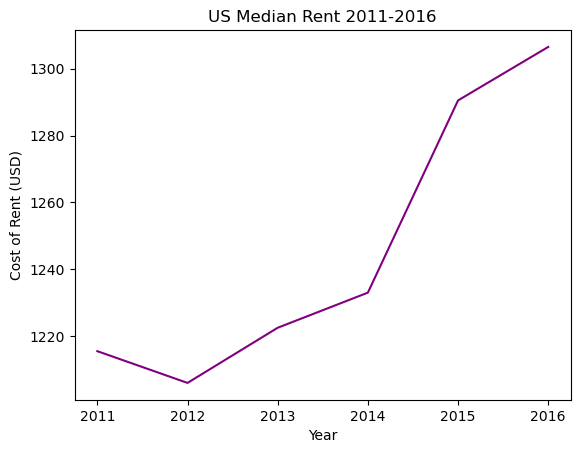

In [241]:
#Line graph of median US Rent change from 2011-2016
#Used https://stackoverflow.com/questions/1347791/unicode-error-unicodeescape-codec-cant-decode-bytes-cannot-open-text-file
#To help with unicode error when trying to save plot

years = ["2011", "2012", "2013", "2014", "2015", "2016",]

US_graph = plt.plot(years, ALL_yearly_rent_df.loc["US",["2011", "2012", "2013", "2014", "2015", "2016",]], label="US", color="purple") 

plt.xlabel("Year")
plt.ylabel("Cost of Rent (USD)")
plt.title("US Median Rent 2011-2016")

plt.savefig('Visualizations Outputs\\US_Rent_graph.png')
plt.show()


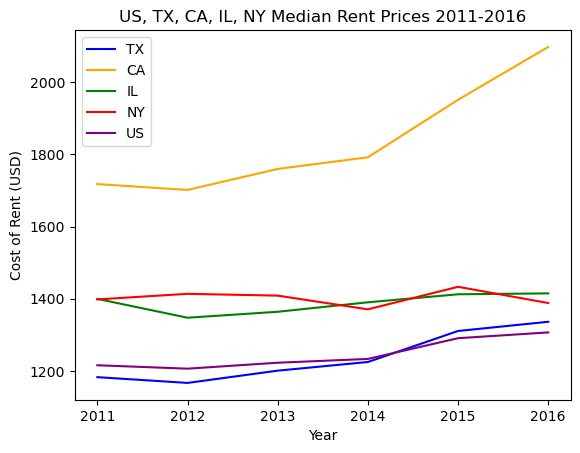

In [225]:
#Line graph showing all 4 states median rent prices throughout timeframe 2011-2016

years = ["2011", "2012", "2013", "2014", "2015", "2016"]

TX_graph = plt.plot(years, ALL_yearly_rent_df.loc["TX",["2011", "2012", "2013", "2014", "2015", "2016",]], label="Texas", color="blue") 

CA_graph = plt.plot(years, ALL_yearly_rent_df.loc["CA",["2011", "2012", "2013", "2014", "2015", "2016",]], label="California", color="orange") 

IL_graph = plt.plot(years, ALL_yearly_rent_df.loc["IL",["2011", "2012", "2013", "2014", "2015", "2016",]], label="Illinois", color="green") 

NY_graph = plt.plot(years, ALL_yearly_rent_df.loc["NY",["2011", "2012", "2013", "2014", "2015", "2016",]], label="New York", color="red") 

US_graph = plt.plot(years, ALL_yearly_rent_df.loc["US",["2011", "2012", "2013", "2014", "2015", "2016",]], label="US", color="purple") 

legend_list = ["TX", "CA", "IL", "NY", "US"]
plt.legend(["TX", "CA", "IL", "NY", "US"], loc="best")


plt.xlabel("Year")
plt.ylabel("Cost of Rent (USD)")
plt.title("US, TX, CA, IL, NY Median Rent Prices 2011-2016")
plt.savefig('Visualizations Outputs\All_Rent_graph.png')
plt.show()


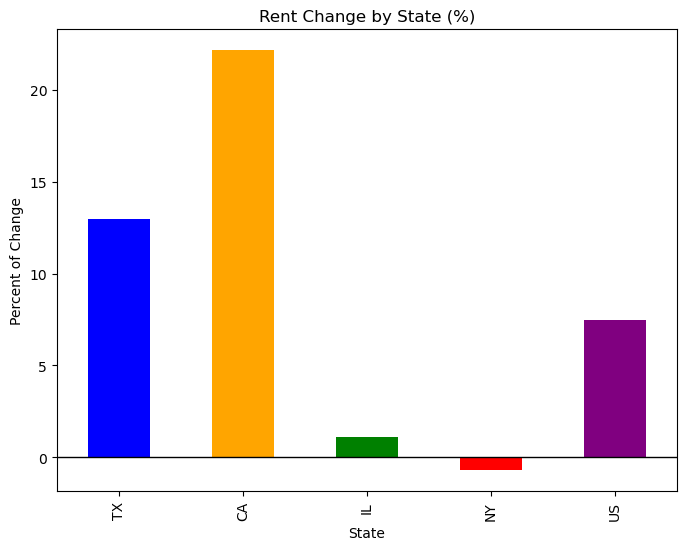

In [226]:
#Bar graph showing the change in rent (%)
rent_change_bar = ALL_yearly_rent_df['Rent Change (%)'].plot(kind="bar", color=["blue", "orange", "green", "red", "purple"], figsize=(8,6),
                                   title="Rent Change by State (%)",
                                   xlabel="State",
                                   ylabel="Percent of Change")
rent_change_bar.axhline(y=0, color= 'black', linewidth=1,)

plt.savefig('Visualizations Outputs\Change_Rent_graph.png')

In [227]:
year = [2011,2011, 2011, 2011, 2012, 2012, 2012, 2012, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016]
rent_cost = [1182.50,1717.75,1399.50,1398.00, 1166.50,1701.50,1347.25,1413.50,1200.50,1759.75,1363.75,1408.50,1224.5,1792.0,1390.0,1370.5,1310.50,1951.50,1412.25,1433.00,1336.00,2098.00,1414.75,1388.00]
correlation = st.pearsonr(rent_cost,year)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.21


## Boxplot and Histogram

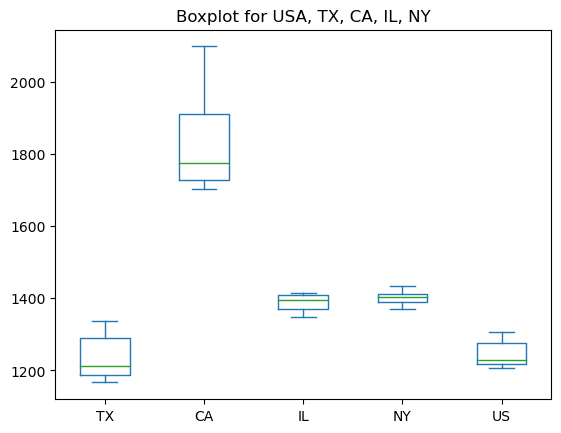

In [242]:
#Box plot for data

rents_data = pd.DataFrame({"TX": [1182.50,1166.50,1200.50,1224.5,1310.50,1336.00], "CA": [1717.75,1701.50,1759.75,1792.0,1951.50,2098.00], 
"IL": [1399.50,1347.25,1363.75,1390.0,1412.25,1414.75], "NY": [1398.00,1413.50,1408.50,1370.5,1433.00,1388.00], "US": [1215.5,1206.0,1222.5,1233.0,1290.5,1306.5]})

# Plot the dataframe
ax = rents_data[['TX', 'CA', 'IL', 'NY', 'US']].plot(kind='box', title='Boxplot for USA, TX, CA, IL, NY')

# Display the plot
plt.savefig('Visualizations Outputs\Boxplot_graph.png')
plt.show()



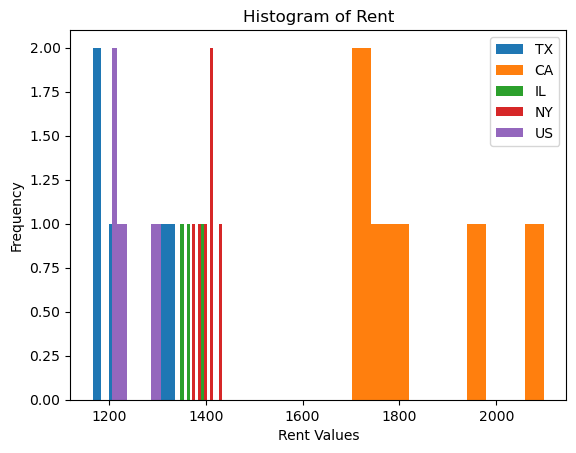

In [240]:
#Histogram
labels = []
for state in ALL_yearly_rent_df_t.columns:
    plt.hist(ALL_yearly_rent_df_t[state]) 
    labels.append(state)

    plt.xlabel('Rent Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Rent')
    
plt.legend(labels)
plt.savefig('Visualizations Outputs\Histogram.png')
plt.show()

## Scatterplots

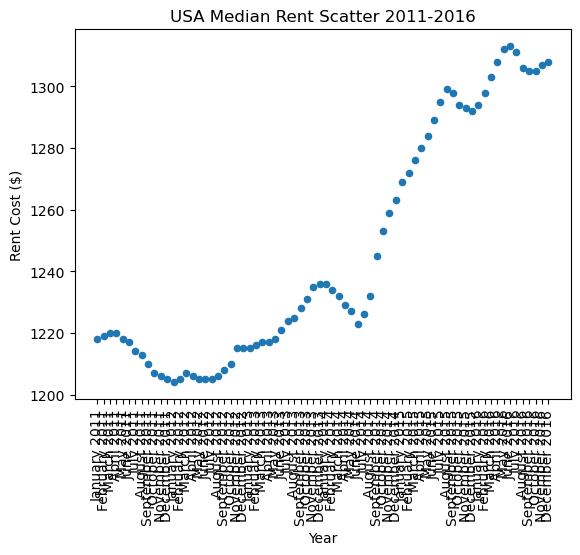

In [244]:
#Scatterplot to show USA median rent data over time
USAdata={
    "Dates":columns_list,
    "Prices":US_med_list
}

USAdf=pd.DataFrame(USAdata)

USAdf.plot(x ='Dates', y ='Prices', kind='scatter')
plt.title("USA Median Rent Scatter 2011-2016")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Rent Cost ($)")
plt.savefig('Visualizations Outputs\\USA_Scatter.png')
plt.show()

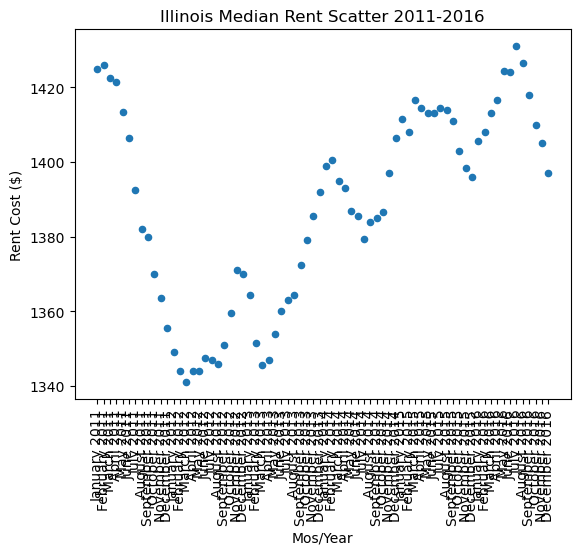

In [245]:
#Scatterplot to show IL median rent data over time
illinoisdata={
    "Dates":columns_list,
    "Prices":IL_med_list
}

illinoisdf=pd.DataFrame(illinoisdata)

illinoisdf.plot(x ='Dates', y ='Prices', kind='scatter')
plt.title("Illinois Median Rent Scatter 2011-2016")
plt.xlabel("Mos/Year")
plt.xticks(rotation=90)
plt.ylabel("Rent Cost ($)")
plt.savefig('Visualizations Outputs\IL_Scatter.png')
plt.show()

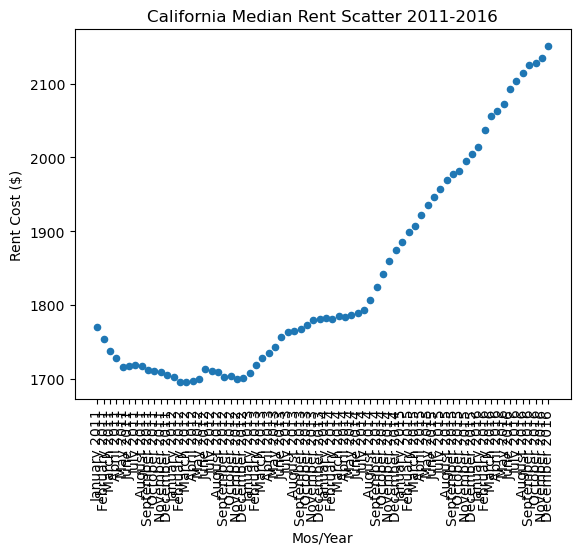

In [246]:
#Scatterplot to show CA median rent data overtime
californiadata={
    "Dates":columns_list,
    "Prices":CA_med_list
}

californiadf=pd.DataFrame(californiadata)

californiadf.plot(x ='Dates', y ='Prices', kind='scatter')
plt.title("California Median Rent Scatter 2011-2016")
plt.xlabel("Mos/Year")
plt.xticks(rotation=90)
plt.ylabel("Rent Cost ($)")
plt.savefig('Visualizations Outputs\CA_Scatter.png')
plt.show()

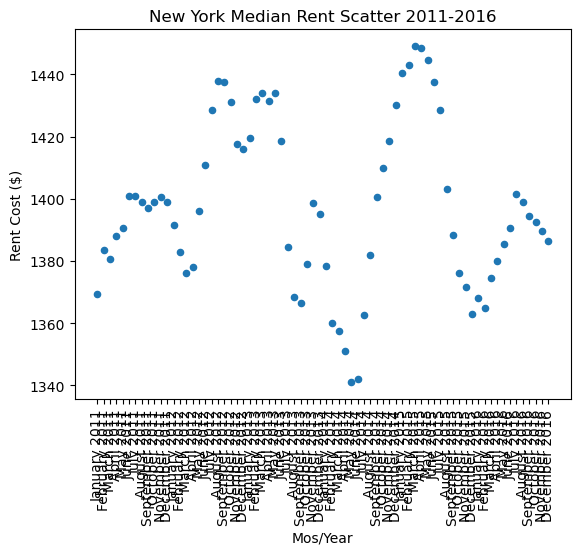

In [248]:
#Scatterplot to show NY median rent data overtime
#Used https://stackoverflow.com/questions/1347791/unicode-error-unicodeescape-codec-cant-decode-bytes-cannot-open-text-file
#To help with unicode error when trying to save plot

newyorkdata={
    "Dates":columns_list,
    "Prices":NY_med_list
}

newyorkdf=pd.DataFrame(newyorkdata)
# texasdf.head()

newyorkdf.plot(x ='Dates', y ='Prices', kind='scatter')
# plt.grid(True)
plt.title("New York Median Rent Scatter 2011-2016")
plt.xlabel("Mos/Year")
plt.xticks(rotation=90)
plt.ylabel("Rent Cost ($)")
plt.savefig('Visualizations Outputs\\NY_Scatter.png')
plt.show()


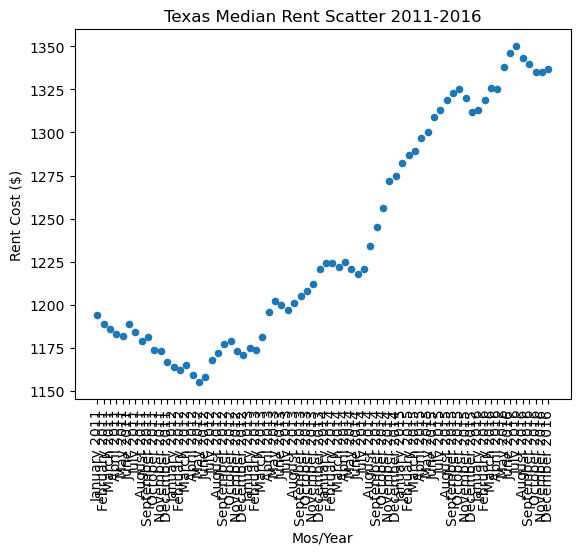

In [247]:
#Scatterplot to show Texas median rent data overtime
texasdata={
    "Dates":columns_list,
    "Prices":TX_med_list
}

texasdf=pd.DataFrame(texasdata)

texasdf.plot(x ='Dates', y ='Prices', kind='scatter')
# plt.grid(True)
plt.title("Texas Median Rent Scatter 2011-2016")
plt.xlabel("Mos/Year")
plt.xticks(rotation=90)
plt.ylabel("Rent Cost ($)")
plt.savefig('Visualizations Outputs\TX_Scatter.png')
plt.show()


## Chi Square Test for Change in Rent

In [230]:
#Using Chi Square Test for change in rent
CA_obs = pd.Series([1717.75,1701.50,1759.75,1792.0,1951.50,2098.00], index=["2011", "2012", "2013", "2014", "2015", "2016"])
#[1215.5,1206.0,1222.5,1233.0,1290.5,1306.5]

CA_Chi_SQ_df = pd.DataFrame(CA_obs)

CA_Chi_SQ_df[1] = [1215.5,1206.0,1222.5,1233.0,1290.5,1306.5]

CA_Chi_SQ_df.columns = ["CA Observed", "Expected"]

CA_Chi_SQ_df.T

,2011,2012,2013,2014,2015,2016
CA Observed,1717.75,1701.5,1759.75,1792.0,1951.5,2098.0
Expected,1215.50,1206.0,1222.50,1233.0,1290.5,1306.5


In [231]:
scaler = StandardScaler()
CA_Chi_SQ_df_scaled = scaler.fit_transform(CA_Chi_SQ_df)

In [232]:
CA_Chi_SQ_df_scaled[:,0]

array([-0.83520169, -0.94925234, -0.54042462, -0.31407795,  0.80537306,
        1.83358355])

## Quartiles, Outliers, and Summary Statistics

In [233]:
# Quartiles and outliers
quartiles_columns = ALL_yearly_rent_df_t.columns

for column in quartiles_columns:
    quartiles = np.percentile(ALL_yearly_rent_df_t[column], [25, 50, 75])
    lower_q = np.percentile(ALL_yearly_rent_df_t, 25)
    upper_q = np.percentile(ALL_yearly_rent_df_t, 75)

    IQR = upper_q - lower_q

    lower_bound = lower_q - 1.5 * IQR
    upper_bound = upper_q + 1.5 * IQR

    outliers = ALL_yearly_rent_df_t.loc[(ALL_yearly_rent_df_t[column] < lower_bound) | (ALL_yearly_rent_df_t[column] > upper_bound)]

In [234]:
#Summary Statistics
summary_stats = ALL_yearly_rent_df_t.describe()
summary_stats

State,TX,CA,IL,NY,US
count,6.00000,6.000000,6.000000,6.000000,6.000000
mean,1236.75000,1836.750000,1387.916667,1401.916667,1245.666667
std,70.18814,156.079627,27.160480,21.631959,42.169499
min,1166.50000,1701.500000,1347.250000,1370.500000,1206.000000
25%,1187.00000,1728.250000,1370.312500,1390.500000,1217.250000
50%,1212.50000,1775.875000,1394.750000,1403.250000,1227.750000
75%,1289.00000,1911.625000,1409.062500,1412.250000,1276.125000
max,1336.00000,2098.000000,1414.750000,1433.000000,1306.500000
